In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import math

# Number of draws to get the first valid ticket

Experimental mean is roughly 1.00555.
Mean calculated from formula is 1.0.


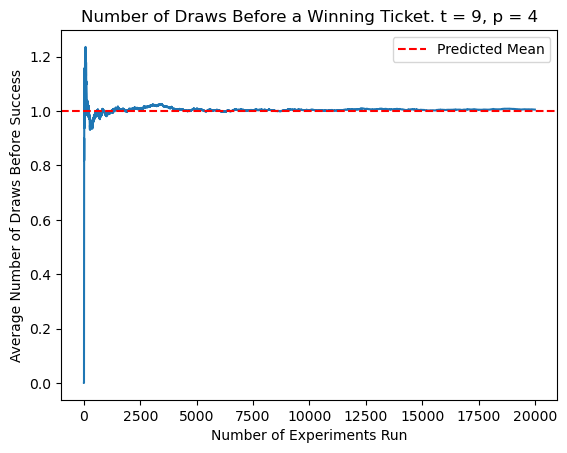

In [51]:
# t is the total number of tickets, p is the number of valid tickets
t = 9
p = 4

# Initialize array to track how many tickets drawn before success
tickets_drawn = []

# Intialize arrays as x and y coordinates to track mean over trials
avgs = []
samples = []

# Run 20,000 trials
for i in range(2*10**4):

    # Add index to x coordinate array
    samples.append(i)

    # Create ticket pool to pull raffle tickets out of
    ticket_pool = ['valid' for _ in range(p)]
    ticket_pool = ticket_pool + ['invalid' for _ in range(t-p)]
    
    last_chosen = 'invalid'
    count = 0

    # While we have not gotten a valid ticket
    while last_chosen == 'invalid':
        
        # Generate random index, increment num draws by 1
        ind = np.random.randint(len(ticket_pool))
        count += 1

        # Check validity of ticket. If valid, append to draw, otherwise discard and repeat
        if ticket_pool[ind] == 'valid':
            tickets_drawn.append(count - 1) # Use count-1, since we want tickets before success
            last_chosen = 'valid'
        else:
            del ticket_pool[ind]

    # Add the new running average to array
    avgs.append(sum(tickets_drawn) / len(tickets_drawn))

# Experimental mean
print(f'Experimental mean is roughly {avgs[-1]}.')

# Calculated mean
meanformula = (t-p) / (p+1)
print(f'Mean calculated from formula is {meanformula}.')

plt.plot(samples, avgs)
plt.title(f'Number of Draws Before a Winning Ticket. t = {t}, p = {p}')
plt.axhline(y=meanformula, color = 'r', linestyle = '--', label = 'Predicted Mean')
plt.xlabel('Number of Experiments Run')
plt.ylabel('Average Number of Draws Before Success')
plt.legend()
plt.show()

# Number of draws to get 2 colors, with 2 colors total

Experimental mean is roughly 2.67805.
Mean calculated from formula is 2.6759639048400325.


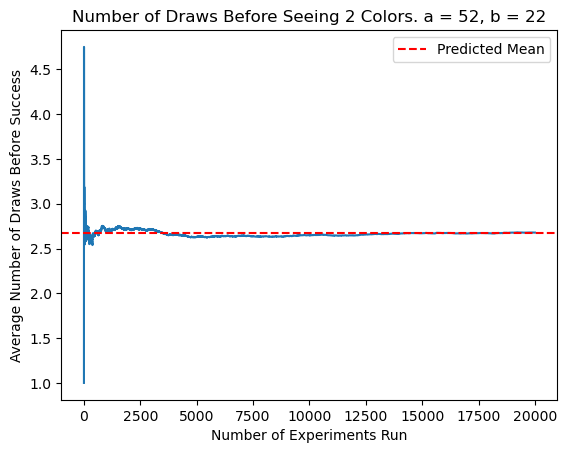

In [4]:
# Initialize number of each color
a = 52
b = 22

# Initialize array to track how many balls drawn per experiment
balls_drawn = []

# Initialize array to track mean over time, and sample numbers
ball_avgs = []
ball_samples = []

# Run 20k trials
for i in range(2*10**4):

    # X coordinates for plot
    ball_samples.append(i)

    # Create urn of balls of very different colors
    ball_pool = ['aqua' for _ in range(a)]
    ball_pool = ball_pool + ['blue' for _ in range(b)]

    # Initialize counts to 0
    a_count = 0
    b_count = 0
    draw_counts = 0

    # While we have not seen both balls
    while (a_count == 0) or (b_count == 0):
        
        # Generate random index, increment num draws by 1
        ind = np.random.randint(len(ball_pool))
        draw_counts += 1

        # Update count depending on color
        if ball_pool[ind] == 'aqua':
            a_count += 1
        else:
            b_count += 1

        # Remove ball from urn
        del ball_pool[ind]

    # Record experiment results
    balls_drawn.append(draw_counts - 1)
    ball_avgs.append(sum(balls_drawn) / len(balls_drawn))

# Experimental mean
print(f'Experimental mean is roughly {ball_avgs[-1]}.')

# Calculated mean
meanformula = a/(b+1) + b/(a+1)
print(f'Mean calculated from formula is {meanformula}.')

# Plot mean over time, as well as calculated E value
plt.plot(ball_samples, ball_avgs)
plt.title(f'Number of Draws Before Seeing 2 Colors. a = {a}, b = {b}')
plt.axhline(y=meanformula, color = 'r', linestyle = '--', label = 'Predicted Mean')
plt.xlabel('Number of Experiments Run')
plt.ylabel('Average Number of Draws Before Success')
plt.legend()
plt.show()

# Number of draws to reach 3 colors, with 3 colors total

Experimental mean is roughly 7.1719.
Mean calculated from formula is 7.199475524475524.


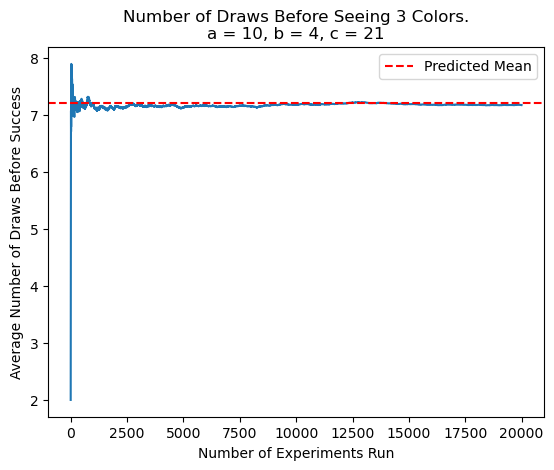

In [8]:
# Initialize number of each color
a = 10
b = 4
c = 21

# Initialize array to track how many balls drawn per experiment
balls_drawn = []

# Initialize array to track mean over time, and sample numbers
ball_avgs = []
ball_samples = []

# Run 20k trials
for i in range(2*10**4):

    # X coordinates for plot
    ball_samples.append(i)

    # Create urn of balls of extremely distinguishable colors
    ball_pool = ['aqua' for _ in range(a)]
    ball_pool = ball_pool + ['blue' for _ in range(b)]
    ball_pool = ball_pool + ['cyan' for _ in range(c)]

    # Initialize counts to 0
    a_count = 0
    b_count = 0
    c_count = 0
    draw_counts = 0

    # While we have not seen 3 colors
    while (a_count != 0) + (b_count != 0) + (c_count != 0) < 3:
        
        # Generate random index, increment num draws by 1
        ind = np.random.randint(len(ball_pool))
        draw_counts += 1

        # Update count depending on color
        if ball_pool[ind] == 'aqua':
            a_count += 1
        elif ball_pool[ind] == 'blue':
            b_count += 1
        else:
            c_count += 1

        # Remove ball from urn
        del ball_pool[ind]

    # Record experiment results
    balls_drawn.append(draw_counts - 1)
    ball_avgs.append(sum(balls_drawn) / len(balls_drawn))

# Experimental mean
print(f'Experimental mean is roughly {ball_avgs[-1]}.')

# Calculated mean
meanformula = (a+b)/(c+1) + (b+c)/(a+1) + (a+c)/(b+1) - a/(b+c+1) - b/(a+c+1) - c/(a+b+1)
print(f'Mean calculated from formula is {meanformula}.')

# Plot mean over time, as well as calculated E value
plt.plot(ball_samples, ball_avgs)
plt.title(f'Number of Draws Before Seeing 3 Colors.\na = {a}, b = {b}, c = {c}')
plt.axhline(y = meanformula, color = 'r', linestyle = '--', label = 'Predicted Mean')
plt.xlabel('Number of Experiments Run')
plt.ylabel('Average Number of Draws Before Success')
plt.legend()
plt.show()

# Number of draws before getting n colors, with n colors total

In [15]:
# Define a couple of functions to calculate the mean


# This helper function generates the portions of the sum for each subset length
# Basically, it generates each part of the PIE calculation

def generateValues(num_each_color):
    # Use the total num balls to help calculate complements
    total = sum(num_each_color)

    # Initialize some variables, l for the number of colors, and subs to hold subsets
    l = len(num_each_color)
    subs = []

    # I'm using combinations from itertools to get subsets
    # I'm arranging subsets by size
    for size in range(l):
        temp_list = list(combinations(num_each_color, size))
        new_list = []
        for item in temp_list:
            new_list.append( list(item) )
        subs.append(new_list)

    values = []

    # Calculating each of the n-1 values and returning
    for i in range(1,l):
        val = 0
        for sub in subs[i]:
            temp_sum = sum(sub)
            temp_complement = total - temp_sum
            val += temp_complement / (temp_sum + 1)
        values.append(val)
    
    return values


# This function calculates the actual mean

def calculateMean(num_each_color, n):

    # Grab the values
    values = generateValues(num_each_color)
    
    # Calculate the mean using the positive/negative value
    mean = 0
    for i in range(n-1):
        mean += ((-1)**(i)) * values[i]
    return mean

Experimental mean is roughly 54.1816.
Mean calculated from formula is 54.06253865608179.


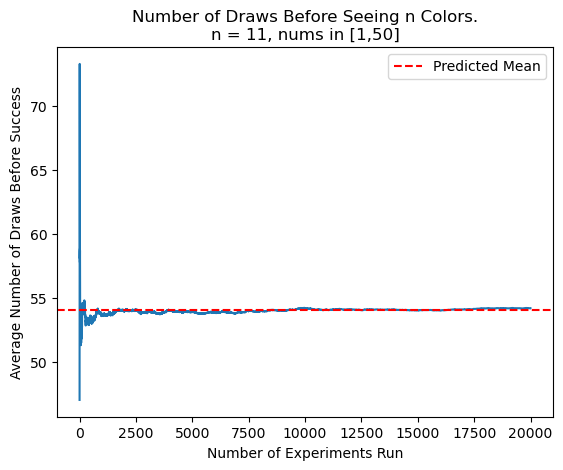

In [24]:
# Initialize n. Should keep n < 23 due to exponential time

n = 11

# Initialize random numbers of each color in [1,50], 50 is arbitrary
# We will now be using the indices as colors
num_each_color = [np.random.randint(low = 1, high = 50) for _ in range(n)]

# Initialize array to track how many balls drawn per experiment
balls_drawn = []

# Initialize array to track mean over time, and sample numbers
ball_avgs = []
ball_samples = []

for i in range(2*10**4):

    # X coordinates for plot
    ball_samples.append(i)

    # Create urn of balls
    ball_pool = []
    
    for i in range(n):
        ball_pool += [i for _ in range(num_each_color[i])]
    
    # Initialize counts to 0
    counts = [0 for i in range(n)]
    draw_counts = 0

    # While we have not seen n colors
    while sum(counts) < n:
        
        # Generate random index, increment num draws by 1
        ind = np.random.randint(len(ball_pool))
        draw_counts += 1

        # Update count of color if it has not been seen
        if counts[ball_pool[ind]] == 0:
            counts[ball_pool[ind]] += 1

        # Remove ball from urn
        del ball_pool[ind]

    # Record experiment results, and -1 since only want draws BEFORE seeing k colors
    balls_drawn.append(draw_counts - 1)
    ball_avgs.append(sum(balls_drawn) / len(balls_drawn))

# Experimental mean
print(f'Experimental mean is roughly {ball_avgs[-1]}.')

# Calculated mean
meanformula = calculateMean(num_each_color, n)
print(f'Mean calculated from formula is {meanformula}.')

# Plot mean over time, as well as calculated E value
plt.plot(ball_samples, ball_avgs)
plt.title(f'Number of Draws Before Seeing n Colors.\nn = {n}, nums in [1,50]')
plt.axhline(y=meanformula, color = 'r', linestyle = '--', label = 'Predicted Mean')
plt.xlabel('Number of Experiments Run')
plt.ylabel('Average Number of Draws Before Success')
plt.legend()
plt.show()

# Number of draws to reach k colors, with n colors total

In [26]:
# Define function to calculate the mean

# This function calculates the mean for the k out of n colors case

def calculateMeanKcase(num_each_color, k, n):

    # Grab the values
    values = generateValues(num_each_color)
    
    # Calculate the mean using the combinations, values, and positive/negative value
    mean = 0
    for i in range(n-1):
        mean += ((-1)**(n-k-i)) * math.comb(i,n-k) * values[i]
    return mean

Experimental mean is roughly 24.8764.
Mean calculated from formula is 24.846871646244836.


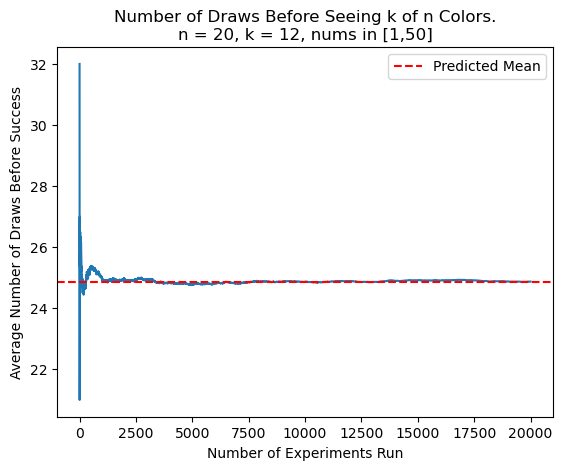

In [29]:
# Initialize k and n. Should keep n < 23 due to exponential time

n = 20
k = 12

# Initialize random numbers of each color in [1,50], 50 is arbitrary
# We will now be using the indices as colors
num_each_color = [np.random.randint(low = 1, high = 50) for _ in range(n)]

# Initialize array to track how many balls drawn per experiment
balls_drawn = []

# Initialize array to track mean over time, and sample numbers
ball_avgs = []
ball_samples = []

for i in range(2*10**4):

    # X coordinates for plot
    ball_samples.append(i)

    # Create urn of balls
    ball_pool = []
    
    for i in range(n):
        ball_pool += [i for _ in range(num_each_color[i])]
    
    # Initialize counts to 0
    counts = [0 for i in range(n)]
    draw_counts = 0

    # While we have not seen k colors
    while sum(counts) < k:
        
        # Generate random index, increment num draws by 1
        ind = np.random.randint(len(ball_pool))
        draw_counts += 1

        # Update count of color if it has not been seen
        if counts[ball_pool[ind]] == 0:
            counts[ball_pool[ind]] += 1

        # Remove ball from urn
        del ball_pool[ind]

    # Record experiment results, and -1 since only want draws before seeing k colors
    balls_drawn.append(draw_counts - 1)
    ball_avgs.append(sum(balls_drawn) / len(balls_drawn))

# Experimental mean
print(f'Experimental mean is roughly {ball_avgs[-1]}.')

# Calculated mean
meanformula = calculateMeanKcase(num_each_color, k, n)
print(f'Mean calculated from formula is {meanformula}.')

# Plot mean over time, as well as calculated E value
plt.plot(ball_samples, ball_avgs)
plt.title(f'Number of Draws Before Seeing k of n Colors.\nn = {n}, k = {k}, nums in [1,50]')
plt.axhline(y=meanformula, color = 'r', linestyle = '--', label = 'Predicted Mean')
plt.xlabel('Number of Experiments Run')
plt.ylabel('Average Number of Draws Before Success')
plt.legend()
plt.show()